In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
filename = "NSL_Regular_Season_Data.csv"
seasondata = pd.read_csv(filename)
# metadata = pd.read_csv("NSL_Metadata.csv")
# groupgames = pd.read_csv("NSL_Group_Round_Games.csv")
seasondata.insert(17, 'Away_ToP', 1-seasondata['Home_ToP'])
seasondata.insert(6, 'home_GD', seasondata['HomeScore']-seasondata['AwayScore'])
seasondata = seasondata.drop(['Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19','Unnamed: 20'], axis=1)
seasondata = seasondata.dropna(axis = 0)
seasondata.head()

,n,game_id,HomeTeam,AwayTeam,HomeScore,AwayScore,home_GD,Home_xG,Away_xG,Home_shots,Away_shots,Home_corner,Away_corner,Home_PK_Goal,Away_PK_Goal,Home_PK_shots,Away_PK_shots,Home_ToP,Away_ToP
0,1,game_2023_1,PRO,MAN,1,1,0,1.63,0.34,17,8,5,4,0,0,0,0,0.53,0.47
1,2,game_2023_2,FOR,LEX,1,0,1,0.98,0.90,9,11,5,2,0,0,0,0,0.57,0.43
2,3,game_2023_3,SJU,DES,1,2,-1,1.23,1.11,16,9,6,7,0,0,0,0,0.47,0.53
3,4,game_2023_4,FAR,ANC,0,1,-1,2.27,1.08,4,14,8,3,0,0,0,0,0.51,0.49
4,5,game_2023_5,DOV,BAK,0,0,0,1.90,0.56,17,6,5,3,0,0,0,0,0.53,0.47


In [ ]:
# # teamlist = metadata["Team_ID"].values
# # averaging over score and xg values for home and away for each team

# X = seasondata.drop(['home_GD', 'HomeScore', 'AwayScore', 'n', 'game_id', 'HomeTeam', 'AwayTeam'], axis=1)
# X = X.dropna(axis = 0)
# print(X.head())
# Y = seasondata['home_GD']
# Y = Y.dropna(axis = 0)
# print(Y.head())

# logreg = LogisticRegression( max_iter = 10000)
# logreg.fit(X, Y)
# svm = SVC()
# svm.fit(X,Y)
# tree = DecisionTreeClassifier()
# tree.fit(X,Y)




In [ ]:
# #neural network implementation
# model = keras.Sequential([
#     layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
#     layers.Dense(32, activation='relu'),
#     layers.Dense(1)  # Output layer with 2 neurons for home_score and away_score
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Train the model
# model.fit(X, Y, epochs=50, batch_size=32, validation_split=0.2)




In [ ]:
# #logistic regression

hometeams = seasondata["HomeTeam"]
hometeams = hometeams.dropna(axis = 0)
awayteams = seasondata["AwayTeam"]
awayteams = awayteams.dropna(axis = 0)


home_features = ['Home_xG', 'Home_shots', 'Home_corner', 'Home_PK_Goal', 'Home_PK_shots', 'Home_ToP']
away_features = ['Away_xG', 'Away_shots', 'Away_corner', 'Away_PK_Goal', 'Away_PK_shots', 'Away_ToP']

# gamepredslog = []
# gamepredssvm = []
# gamepredstree = []
# gamepredsnn = []
# correctpredslog = 0
# correctpredssvm = 0
# correctpredstree = 0
# correctpredsnn = 0
# for i in range(len(hometeams)):
#   game = []
#   homeDF = seasondata.loc[(seasondata.HomeTeam == hometeams[i])]
#   homeDF = homeDF.dropna(axis = 1)

#   awayDF = seasondata.loc[(seasondata.AwayTeam == awayteams[i])]
#   awayDF = awayDF.dropna(axis = 1)
#   for x in range(len(home_features)):
#     game.append(homeDF[home_features[x]].mean())
#     game.append(awayDF[away_features[x]].mean())

#   gamepredlog = logreg.predict([game])
#   gamepredsvm = svm.predict([game])
#   gamepredtree = tree.predict([game])
#   gameprednn = model.predict([game])

#   gamepredslog.append(gamepredlog)
#   gamepredssvm.append(gamepredsvm)
#   gamepredstree.append(gamepredtree)
#   gamepredsnn.append(gameprednn)

#   if gamepredlog == seasondata['home_GD'][i]:
#     correctpredslog+=1
#   if gamepredsvm == seasondata['home_GD'][i]:
#     correctpredssvm+=1
#   if gamepredtree == seasondata['home_GD'][i]:
#     correctpredstree+=1
#   # if gameprednn == seasondata['home_GD'][i]:
#   #   correctpredsnn+=1




# print(correctpredslog/476)
# print(correctpredstree/476)
# print(correctpredsnn/476)



In [ ]:
PRO = seasondata.loc[(seasondata.HomeTeam == "PRO")]
PRO["Home_xG"].corr(PRO["HomeScore"])
# scaler = StandardScaler()
# scaler.fit(PRO[["HomeScore"]])
# PRO["HomeScore"] = scaler.transform(PRO[["HomeScore"]])
finalMetric = 0

homeTeamMetrics = []
awayTeamMetrics = []

for i in range(len(hometeams)):
  game = []
  homeDF = seasondata.loc[(seasondata.HomeTeam == hometeams[i])]
  homeDF = homeDF.dropna(axis = 1)

  awayDF = seasondata.loc[(seasondata.AwayTeam == awayteams[i])]
  awayDF = awayDF.dropna(axis = 1)

  for x in range(len(home_features)):

    homecorr = homeDF[home_features[x]].corr(homeDF['HomeScore'])
    awaycorr = awayDF[away_features[x]].corr(awayDF['AwayScore'])
  # scaler.fit(PRO[[feature]])
  # PRO[feature] = scaler.transform(PRO[[feature]])
    homeFeatureScore = 0
    awayFeatureScore = 0
    for h in homeDF.index:

      homeFeatureScore += (homecorr*homeDF.loc[i, home_features[x]])
    for a in awayDF.index:
      awayFeatureScore += (awaycorr*awayDF.loc[i, away_features[x]])


  homeTeamMetrics.append(homeFeatureScore/len(homeDF))
  awayTeamMetrics.append(awayFeatureScore/len(awayDF))

print(homeTeamMetrics)
print(awayTeamMetrics)
  # PRO.plot(x = feature,  y = "HomeScore", kind = "scatter")




[0.08728989805623363, -0.2977257227575852, -0.016263803990914375, 0.02460022236019301, 0.1853768101620861, -0.23989907711159025, -0.006887913656681482, 0.1949952755048279, 0.05594456909753532, 0.13421075716323647, 0.30249694869789334, 0.04204703090041108, -0.02537414160285689, 0.029581368626462375, -0.14219592967460917, 0.033964703050734193, -0.027490421455938677, 0.11440412103717444, -0.02989341324028784, 0.1966595679434189, -0.09020235256013047, 0.21271378505099892, 0.2663516879583057, 0.06161712874824922, 0.07395986171620791, -0.30294898105157797, 0.03328265378143759, -0.1732604445805929, -0.019032111053197683, 0.07877908709652932, 0.08711926342174998, 0.07740802280458457, -0.01634870025499674, -0.008922979055246461, 0.03537989901118145, 0.10842794556650316, 0.03615500609900956, 0.16420654779353935, 0.046013731928751765, -0.03460110218571393, 0.123043180133175, 0.046013731928751765, 0.045982931901678535, -0.027490421455938677, -0.031140991967142543, -0.02989341324028784, 0.064714879

In [ ]:
homeMetricData = pd.Series(homeTeamMetrics)
awayMetricData = pd.Series(awayTeamMetrics)
metricData = pd.concat([homeMetricData,awayMetricData],axis=1)
metricData.columns = ['HomeMetric', 'AwayMetric']
metricData.insert(2, "Home_GD", seasondata['HomeScore']-seasondata['AwayScore'] )



In [ ]:
lrnew = LogisticRegression()
lrnew.fit(metricData[["HomeMetric", "AwayMetric"]], metricData["Home_GD"])

for i in range(len(hometeams)):
  game = []
  homeDF = seasondata.loc[(seasondata.HomeTeam == hometeams[i])]
  homeDF = homeDF.dropna(axis = 1)

  awayDF = seasondata.loc[(seasondata.AwayTeam == awayteams[i])]
  awayDF = awayDF.dropna(axis = 1)

  for x in range(len(home_features)):

    homecorr = homeDF[home_features[x]].corr(homeDF['HomeScore'])
    awaycorr = awayDF[away_features[x]].corr(awayDF['AwayScore'])
  # scaler.fit(PRO[[feature]])
  # PRO[feature] = scaler.transform(PRO[[feature]])
    homeFeatureScore = 0
    awayFeatureScore = 0
    for h in homeDF.index:

      homeFeatureScore += (homecorr*homeDF.loc[h, home_features[x]])
    for a in awayDF.index:
      awayFeatureScore += (awaycorr*awayDF.loc[a, away_features[x]])





-0.40707402251924074


<Axes: xlabel='Away_xG', ylabel='home_GD'>

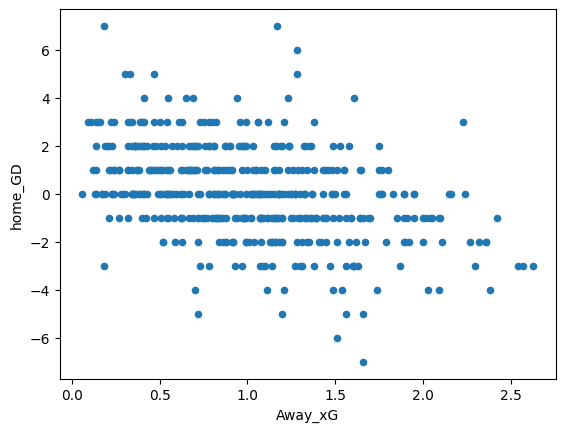

In [ ]:

print(seasondata['Away_xG'].corr(seasondata['home_GD']))

seasondata.plot(x = 'Away_xG', y='home_GD', kind='scatter')
# AUG = seasondata.loc[(seasondata.HomeTeam == "AUG")]
# print(AUG["Home_xG"].corr(AUG["home_GD"]))
# AUG.plot(x = 'Home_xG', y='home_GD', kind='scatter')

In [ ]:
awaywins = 0
tie = 0
homewins = 0
for i in range(len(seasondata)):
  if seasondata.loc[i, 'HomeScore'] > seasondata.loc[i, 'AwayScore']:
    homewins += 1
  elif seasondata.loc[i, 'HomeScore'] == seasondata.loc[i, 'AwayScore']:
    tie += 1
  elif seasondata.loc[i, 'HomeScore'] < seasondata.loc[i, 'AwayScore']:
    awaywins += 1
print(awaywins)
print(homewins)
print(tie)




177
185
114


In [ ]:
metadata = pd.read_csv("NSL_Metadata.csv")
teams = metadata["Team_ID"]
for x in teams:
  home = seasondata.loc[(seasondata.HomeTeam == x)]
  away = seasondata.loc[(seasondata.AwayTeam == x)]
  homewin = 0
  hometie = 0
  homeloss = 0
  awaywin = 0
  awaytie = 0
  awayloss = 0
  for h in home.index:
    if home.loc[h, 'HomeScore'] > home.loc[h, 'AwayScore']:
      homewin += 1
    elif home.loc[h, 'HomeScore'] == home.loc[h, 'AwayScore']:
      hometie += 1
    elif home.loc[h, 'HomeScore'] < home.loc[h, 'AwayScore']:
      homeloss += 1
  for a in away.index:
    if away.loc[a, 'HomeScore'] > away.loc[a, 'AwayScore']:
      awayloss += 1
    elif away.loc[a, 'HomeScore'] == away.loc[a, 'AwayScore']:
      awaytie += 1
    elif away.loc[a, 'HomeScore'] < away.loc[a, 'AwayScore']:
      awaywin += 1

  print(x, " home wins:",homewin, " away wins:",awaywin, " homeloss:",homeloss, " awayloss:",awayloss)



ALB  home wins: 4  away wins: 5  homeloss: 8  awayloss: 7
ANC  home wins: 11  away wins: 9  homeloss: 2  awayloss: 5
AUG  home wins: 11  away wins: 8  homeloss: 3  awayloss: 4
BAK  home wins: 7  away wins: 4  homeloss: 7  awayloss: 7
BOI  home wins: 6  away wins: 5  homeloss: 6  awayloss: 6
CHM  home wins: 4  away wins: 5  homeloss: 7  awayloss: 5
DES  home wins: 5  away wins: 8  homeloss: 9  awayloss: 4
DOV  home wins: 7  away wins: 7  homeloss: 6  awayloss: 6
EUG  home wins: 7  away wins: 5  homeloss: 7  awayloss: 8
FAR  home wins: 10  away wins: 10  homeloss: 5  awayloss: 6
FOR  home wins: 8  away wins: 4  homeloss: 7  awayloss: 9
JAC  home wins: 8  away wins: 9  homeloss: 5  awayloss: 2
LAR  home wins: 8  away wins: 10  homeloss: 6  awayloss: 4
LEX  home wins: 7  away wins: 6  homeloss: 5  awayloss: 7
LRO  home wins: 6  away wins: 9  homeloss: 6  awayloss: 5
MAN  home wins: 6  away wins: 2  homeloss: 8  awayloss: 7
MOB  home wins: 3  away wins: 7  homeloss: 8  awayloss: 6
OAK  home

In [ ]:
allxG = seasondata['Home_xG'].append(seasondata['Away_xG'])
print(allxG.mean())
print(allxG.max())
print(allxG.min())


1.3051785714285713
4.03
0.06


**SAMPLING**

**ELO GENERATION**

In [ ]:
# import csv
# import math
# import os
# import random

# GD = 0


# # Function to calculate the expected score
# def expected_score(elo_a, elo_b):
#     return 1 / (1 + math.pow(10, (elo_b - elo_a) / 1000))


# kscale = 0.8


# # Function to update Elo ratings
# def update_elo(winner_elo, loser_elo, xG):
#     if GD == 0:
#         k = 80 * kscale + 10 * (1.31 - xG)
#         expected_winner_score = expected_score(winner_elo, loser_elo)
#         expected_loser_score = 1 - expected_winner_score
#         new_winner_elo = winner_elo + k * (0.5 - expected_winner_score)
#         new_loser_elo = loser_elo + k * (0.5 - expected_loser_score)
#         return new_winner_elo, new_loser_elo
#     else:
#         if GD == 1:
#             k = 100 * kscale + 10 * (1.31 - xG)  # Elo update factor
#         if GD == 2:
#             k = 120 * kscale + 10 * (1.31 - xG)
#         if GD == 3:
#             k = 150 * kscale + 10 * (1.31 - xG)
#         if GD == 4:
#             k = 200 * kscale + 10 * (1.31 - xG)
#         if GD == 5:
#             k = 220 * kscale + 10 * (1.31 - xG)
#         if GD == 6:
#             k = 230 * kscale + 10 * (1.31 - xG)
#         if GD == 7:
#             k = 240 * kscale + 10 * (1.31 - xG)
#         else:
#             k = 250 * kscale + 10 * (1.31 - xG)

#         expected_winner_score = expected_score(winner_elo, loser_elo)
#         expected_loser_score = 1 - expected_winner_score
#         new_winner_elo = winner_elo + k * (1 - expected_winner_score)
#         new_loser_elo = loser_elo + k * (0 - expected_loser_score)
#         return new_winner_elo, new_loser_elo


# # Read CSV file and update Elo ratings
# teams_elo = {}  # Dictionary to store Elo ratings for each team

# with open("NSL_Regular_Season_Data.csv", mode='r') as file:
#     reader = csv.DictReader(file)
#     data = list(reader)
#     a = [x for x in range(476)]
#     for y in range(476):
#         b = random.choice(a)
#         row = data[b]
#         a.pop(a.index(b))
#         home_team = row['HomeTeam']
#         away_team = row['AwayTeam']

#         home_score = int(row['HomeScore'])
#         away_score = int(row['AwayScore'])

#         home_xG = float(row['Home_xG'])
#         away_xG = float(row['Away_xG'])

#         # Initialize Elo ratings if not already present
#         teams_elo.setdefault(home_team, 1000)
#         teams_elo.setdefault(away_team, 1000)

#         # Update Elo ratings based on game result
#         if home_score > away_score:
#             GD = home_score - away_score
#             teams_elo[home_team], teams_elo[away_team] = update_elo(teams_elo[home_team], teams_elo[away_team], home_xG)
#         elif away_score > home_score:
#             GD = away_score - home_score
#             teams_elo[away_team], teams_elo[home_team] = update_elo(teams_elo[away_team], teams_elo[home_team], away_xG)
#         elif away_score == home_score:
#             teams_elo[home_team], teams_elo[away_team] = update_elo(teams_elo[home_team], teams_elo[away_team], home_xG)

# # Divide teams into Eastern and Western conferences
# eastern_teams = ['AUG', 'JAC', 'LAR', 'PRO', 'LRO', 'SPR', 'DOV', 'LEX', 'TOL', 'DES', 'CHM', 'MOB', 'MAN', 'SJU']
# western_teams = ['ANC', 'FAR', 'SFS', 'OAK', 'SAS', 'REN', 'BAK', 'BOI', 'EUG', 'FOR', 'ALB', 'WIC', 'TUC', 'TAC']

# # Separate teams into their conferences and order them based on Elo ratings within each conference
# eastern_teams_elo = {team: teams_elo[team] for team in eastern_teams}
# western_teams_elo = {team: teams_elo[team] for team in western_teams}
# all_teams_elo = {**eastern_teams_elo, **western_teams_elo}

# sorted_eastern_teams = sorted(eastern_teams_elo.items(), key=lambda x: x[1], reverse=True)
# sorted_western_teams = sorted(western_teams_elo.items(), key=lambda x: x[1], reverse=True)
# sorted_all_teams = sorted(all_teams_elo.items(), key=lambda x: x[1], reverse=True)

# # Write final Elo ratings to separate CSV files for each conference
# file_path_eastern = 'final_elo_ratings_eastern.csv'
# file_path_western = 'final_elo_ratings_western.csv'
# file_path_all = 'final_elo_ratings.csv'

# # with open(file_path_eastern, mode='w', newline='') as file:
# #     writer = csv.writer(file)
# #     writer.writerow(['Team', 'Elo Rating'])
# #     for team, elo in sorted_eastern_teams:
# #         writer.writerow([team, elo])
# #
# # with open(file_path_western, mode='w', newline='') as file:
# #     writer = csv.writer(file)
# #     writer.writerow(['Team', 'Elo Rating'])
# #     for team, elo in sorted_western_teams:
# #         writer.writerow([team, elo])

# with open(file_path_all, mode='w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(['Team', 'Elo Rating'])
#     for team, elo in sorted_all_teams:
#         writer.writerow([team, elo])

**ELO - IMPLEMENTATION AND TESTING**

In [ ]:
import math
predprob = []
accprob = []
ratings = pd.read_csv("avgelos.csv")

# eastern_teams = ['AUG', 'JAC', 'LAR', 'PRO', 'LRO', 'SPR', 'DOV', 'LEX', 'TOL', 'DES', 'CHM', 'MOB', 'MAN', 'SJU']
# western_teams = ['ANC', 'FAR', 'SFS', 'OAK', 'SAS', 'REN', 'BAK', 'BOI', 'EUG', 'FOR', 'ALB', 'WIC', 'TUC', 'TAC']

def expected_score(elo_a, elo_b):
    # returns prob of TEAM A winning
    return 1 / (1 + math.pow(10, (elo_b - elo_a) / 1000))

HOMEELOS = []
AWAYELOS= []
HOMEGDS = []
AWAYGDS = []
nonties = 0

for i in range(len(seasondata)):
  homeidx = ratings.index[ratings['Team'] == seasondata.loc[i, "HomeTeam"]].tolist()[0]
  awayidx = ratings.index[ratings['Team'] == seasondata.loc[i, "AwayTeam"]].tolist()[0]

  homeelo = ratings.loc[homeidx, "AvgElos"]
  awayelo =  ratings.loc[awayidx, "AvgElos"]


  elodif =abs(homeelo - awayelo)

  if (700<elodif) and (elodif<=800):
    HOMEELOS.append(seasondata.loc[i, "HomeTeam"])
    AWAYELOS.append(seasondata.loc[i, "AwayTeam"])
    HOMEGDS.append(seasondata.loc[i, "home_GD"])
    AWAYGDS.append(seasondata.loc[i, "AwayScore"] - seasondata.loc[i, "HomeScore"])
    if seasondata.loc[i, "home_GD"] != 0:
      nonties += 1

correctpreds = 0
for x in range(len(HOMEELOS)):

  homeidx = ratings.index[ratings['Team'] == HOMEELOS[x]].tolist()[0]
  awayidx = ratings.index[ratings['Team'] == AWAYELOS[x]].tolist()[0]

  homeelo = ratings.loc[homeidx, "AvgElos"]
  awayelo =  ratings.loc[awayidx, "AvgElos"]

  if HOMEGDS[x]>0:
    winnerelo = ratings.loc[homeidx, "AvgElos"]
    loserelo = ratings.loc[awayidx, "AvgElos"]

    # print("home", homeGDelo50[x], winnerelo, loserelo, expected_score(winnerelo, loserelo))
    if expected_score(winnerelo, loserelo)>=(0.5):
      correctpreds+=1

  elif AWAYGDS[x]>0:

    winnerelo = ratings.loc[awayidx, "AvgElos"]
    loserelo = ratings.loc[homeidx, "AvgElos"]
  #   print("away", awayGDelo50[x], winnerelo, loserelo, expected_score(winnerelo, loserelo))

    if expected_score(winnerelo, loserelo)>=(0.5):
      correctpreds+=1

print(HOMEELOS)
print(AWAYELOS)
print(HOMEGDS)
print(AWAYGDS)
print(correctpreds)
print(nonties)
print(correctpreds/nonties)


['LRO', 'FAR', 'TAC', 'TAC', 'SJU', 'SFS']
['TAC', 'TAC', 'FAR', 'SFS', 'ANC', 'TAC']
[0, 3, -2, -2, 0, 0]
[0, -3, 2, 2, 0, 0]
3
3
1.0


In [ ]:
# # for elos between 0 to 50

# def expected_score(elo_a, elo_b):
#     # returns prob of TEAM A winning
#     return 1 / (1 + math.pow(10, (elo_b - elo_a) / 400))
# nummatches = len(homeelo50)
# winprob = expected_score(0,-50)

# correctpreds = 0
# averageelodif = 0
# tieprob = []
# tieelo = []
# ties= 0
# tiepreds = 0

# for x in range(len(homeelo50)):
#   homeidx = ratings.index[ratings['Team'] == homeelo50[x]].tolist()[0]
#   awayidx = ratings.index[ratings['Team'] == awayelo50[x]].tolist()[0]



#   homeelo = ratings.loc[homeidx, "Elo Rating"]
#   awayelo =  ratings.loc[awayidx, "Elo Rating"]
#   averageelodif += abs(homeelo-awayelo)


#   if homeGDelo50[x]>0:
#     winnerelo = ratings.loc[homeidx, "Elo Rating"]
#     loserelo = ratings.loc[awayidx, "Elo Rating"]

#     # print("home", homeGDelo50[x], winnerelo, loserelo, expected_score(winnerelo, loserelo))

#     if expected_score(winnerelo, loserelo)>=(0.56):
#       correctpreds+=1


#   elif awayGDelo50[x]>0:


#     winnerelo = ratings.loc[awayidx, "Elo Rating"]
#     loserelo = ratings.loc[homeidx, "Elo Rating"]
#   #   print("away", awayGDelo50[x], winnerelo, loserelo, expected_score(winnerelo, loserelo))

#     if expected_score(winnerelo, loserelo)>=(0.56):
#       correctpreds+=1

#   elif homeGDelo50[x] == 0:
#     ties+=1

#     homeelo = ratings.loc[homeidx, "Elo Rating"]
#     awayelo =  ratings.loc[awayidx, "Elo Rating"]

#     tieprob.append(expected_score(homeelo, awayelo))
#     tieelo.append(abs(homeelo-awayelo))

#     # print("tie", awayGDelo50[x], homeelo, awayelo, expected_score(homeelo, awayelo))

#     if (0.44)<expected_score(homeelo, awayelo) and expected_score(homeelo, awayelo)<(0.56):
#       tiepreds+=1

# tieprob.sort()
# tieelo.sort()

# # print((max(tieprob)-min(tieprob))/2)
# print(max(tieelo) - min(tieelo))

# print(averageelodif/47)
# print(expected_score(0, -(averageelodif/47)))
# print(correctpreds)
# print(correctpreds/36)
# print(tiepreds)
# print(ties)
# print(tiepreds/ties)










In [ ]:
# elodifs = []

# predties = 0
# for j in range(len(seasondata)):
#   if seasondata.loc[j, "HomeScore"] == seasondata.loc[j, "AwayScore"]:
#     homeidx = ratings.index[ratings['Team'] == seasondata.loc[j, "HomeTeam"]].tolist()[0]
#     awayidx = ratings.index[ratings['Team'] == seasondata.loc[j, "AwayTeam"]].tolist()[0]

#     homeelo = ratings.loc[homeidx, "Elo Rating"]
#     awayelo =  ratings.loc[awayidx, "Elo Rating"]
#     elodifs.append(homeelo - awayelo)

#   if 0.35<=expected_score(homeelo, awayelo) and expected_score(homeelo, awayelo)<=0.65:
#       predties += 1
# print(predties)
# print(len(elodifs))

In [ ]:
# import seaborn as sns
# # sns.histplot(elodifs,kde = True)
# q3, q1 = np.percentile(elodifs, [75, 25])
# print(q3-q1)



In [ ]:
a = [x for x in range(476)]
print(a)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,